# Colab 사전 준비

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 50 kB 4.5 MB/s 
     |████████████████████████████████| 503 kB 51.2 MB/s 
     |████████████████████████████████| 3.8 MB 51.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6526c1520ecd295afe74b9ade3c6fe0e3ecc32d1ba0a050a6b63757c3ed870c5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 선형회귀분석
- 단순선형회귀분석 모델의 비용 구하기

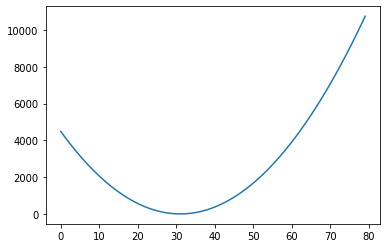

In [ ]:
#### 데이터 준비
X_train = [1,2,3]
y_train = [1,2,3]

W = tf.placeholder(tf.float32)
#### 가설 준비(y=wx) : 지금은 데이터가 쉬워서 가중치 알 수 있으나, 원래는 이거 찾는데 엄청 고생
hypot = W * X_train

#### 비용? 잔차제곱합을 의미. 즉 잔차제곱합(평균제곱오차)가 최소가 되도록 만드는 값, 직선을 찾아야하는데 일단 비용부터 구해보자
cost = tf.reduce_mean(tf.square(hypot-y_train))
#mean((sum(blabla~)^2)) 이렇게 안하는 이유는 이건 바로 계산이 되어 그래프로 나타낼 수 없다.
#tf로 하면 그래프로 나타낼 수 있다.

# =============== 그래프 완성! ======================

#### 이제 w값을 찾아보자
sess = tf.Session()

cost_val = []
for i in range(-30, 50):
  result = sess.run(cost, feed_dict={W:i})
  cost_val.append(result)

plt.plot(cost_val)
sess.close()
# 결과를 보면 convex graph로


In [ ]:
#### 경사하강 알고리즘을 이용해 가중치 학습시키기
# 앞에서 데이터 가져오기
X_train = [1,2,3]
y_train = [1,2,3]
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
# b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
hypot = W * X_train
cost = tf.reduce_mean(tf.square(hypot-y_train))


#### 최저비용학습을 위한 경사하강알고리즘(gradient decent) :: 미분 개념
# x의 순간변화값과 y값의 차이를 구하는 것?
gradient = tf.reduce_mean((hypot-y_train)*X_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
# 원래는 W = W - (learning_rate * gradient). 그런데 왜 못하냐면 갱신이 안되서. 코드상으로 구현 불가
# 그래서 assign이란 함수를 쓴다.

updata = W.assign(descent)

# ================================ Gradient Descent 그래프 완성

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# learning_rate는 내려가는 보폭 / 반복문 range는 훈련 횟수.
# 적절한 값 분포가 필요하다. 예)learning_rate를 너무 줄이면 훈련 횟수를 엄청 늘려야 한다.

for step in range(100):
  _, weight, c = sess.run([updata, W, cost])
  print(step, weight, c)
  #여러개의 노드를 한번에 묶어 진행 가능 []로 묶어줘

sess.close()


0 [1.3590611] 0.6619941
1 [1.342305] 0.6016494
2 [1.3263307] 0.5468057
3 [1.3111019] 0.49696127
4 [1.2965838] 0.45166054
5 [1.2827432] 0.41048908
6 [1.2695485] 0.37307072
7 [1.2569696] 0.33906332
8 [1.2449777] 0.30815575
9 [1.2335454] 0.28006572
10 [1.2226466] 0.25453624
11 [1.2122564] 0.23133366
12 [1.2023511] 0.21024637
13 [1.192908] 0.19108117
14 [1.1839057] 0.17366306
15 [1.1753235] 0.15783285
16 [1.1671417] 0.1434455
17 [1.1593417] 0.13036959
18 [1.1519058] 0.11848558
19 [1.1448169] 0.10768503
20 [1.1380588] 0.097869
21 [1.131616] 0.08894775
22 [1.125474] 0.08083957
23 [1.1196185] 0.07347069
24 [1.1140363] 0.06677347
25 [1.1087146] 0.060686648
26 [1.1036413] 0.05515468
27 [1.0988047] 0.05012706
28 [1.0941938] 0.045557734
29 [1.0897981] 0.041404862
30 [1.0856075] 0.037630606
31 [1.0816125] 0.034200363
32 [1.0778039] 0.031082757
33 [1.074173] 0.028249383
34 [1.0707116] 0.025674274
35 [1.0674118] 0.023333952
36 [1.0642658] 0.021206943
37 [1.0612668] 0.019273812
38 [1.0584077] 0.01751

In [ ]:
#### 경사하강 알고리즘을 이용해 가중치 학습시키기
#### 실제론 아래와 같은 방법을 사용한다.
#### placeholder로 지정 후 실행할 때 feed_dict로 데이터값을 넘겨받는 형식
# 앞에서 데이터 가져오기
X_train = tf.placeholder(tf.float32, shape=[None]) #None 입력 : shape의 크기에 영향을 받지 않고 값을 받아준다.
y_train = tf.placeholder(tf.float32, shape=[None]) #pandas에서 (-1, -1)과 같은
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
#b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
hypot = W * X_train
cost = tf.reduce_mean(tf.square(hypot-y_train))


#### 최저비용학습을 위한 경사하강알고리즘(gradient decent) :: 미분 개념
# x의 순간변화값과 y값의 차이를 구하는 것?
gradient = tf.reduce_mean((hypot-y_train)*X_train)
learning_rate = 0.05
descent = W - (learning_rate * gradient)
# 원래는 W = W - (learning_rate * gradient). 그런데 왜 못하냐면 갱신이 안되서. 코드상으로 구현 불가
# 그래서 assign이란 함수를 쓴다.

updata = W.assign(descent)

# ================================ Gradient Descent 그래프 완성

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# learning_rate는 내려가는 보폭 / 반복문 range는 훈련 횟수.
# 적절한 값 분포가 필요하다. 예)learning_rate를 너무 줄이면 훈련 횟수를 엄청 늘려야 한다.

for step in range(40):
  _, weight, c = sess.run([updata, W, cost], feed_dict={X_train:[1,2,3,4,5], y_train:[1,2,3,4,5]})
  print(step, weight, c)
  #여러개의 노드를 한번에 묶어 진행 가능 []로 묶어줘

sess.close()

0 [0.9186523] 0.3594663
1 [0.9633935] 0.0727919
2 [0.98352706] 0.01474039
3 [0.99258715] 0.0029849322
4 [0.9966642] 0.00060445076
5 [0.9984989] 0.0001224011
6 [0.9993245] 2.4785764e-05
7 [0.999696] 5.019262e-06
8 [0.9998632] 1.0166119e-06
9 [0.9999384] 2.0577586e-07
10 [0.9999723] 4.1728107e-08
11 [0.99998754] 8.461942e-09
12 [0.9999944] 1.7124002e-09
13 [0.9999975] 3.4584957e-10
14 [0.99999887] 6.87038e-11
15 [0.99999946] 1.4163249e-11
16 [0.99999976] 3.4027891e-12
17 [0.9999999] 5.2295944e-13
18 [0.99999994] 1.5063507e-13
19 [1.] 7.176482e-14
20 [1.] 0.0
21 [1.] 0.0
22 [1.] 0.0
23 [1.] 0.0
24 [1.] 0.0
25 [1.] 0.0
26 [1.] 0.0
27 [1.] 0.0
28 [1.] 0.0
29 [1.] 0.0
30 [1.] 0.0
31 [1.] 0.0
32 [1.] 0.0
33 [1.] 0.0
34 [1.] 0.0
35 [1.] 0.0
36 [1.] 0.0
37 [1.] 0.0
38 [1.] 0.0
39 [1.] 0.0


In [ ]:
#### 실제로 사용할 땐 만들어져 있는 모델을 사용합니다.
X_train = tf.placeholder(tf.float32, shape=[None])#None 입력 : shape의 크기에 영향을 받지 않고 값을 받아준다.
y_train = tf.placeholder(tf.float32, shape=[None])#pandas에서 (-1, -1)과 같은
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
hypot = W * X_train + b
cost = tf.reduce_mean(tf.square(hypot-y_train))


#### 최저비용학습을 위한 경사하강알고리즘(gradient decent) :: 미분 개념
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# ================================ Gradient Descent 그래프 완성

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# learning_rate는 내려가는 보폭 / 반복문 range는 훈련 횟수.
# 적절한 값 분포가 필요하다. 예)learning_rate를 너무 줄이면 훈련 횟수를 엄청 늘려야 한다.

for step in range(40):
  _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={X_train:[1,2,3,4,5], y_train:[2.1,3.1,4.1,5.1,6.1]})
  print(step, weight, c, bias)
#여러개의 노드를 한번에 묶어 진행 가능 []로 묶어줘


0 [-1.2100062] 92.28515 [1.0941459]
1 [-0.72345364] 53.803062 [1.2268634]
2 [-0.35190564] 31.377447 [1.3277333]
3 [-0.06815043] 18.308756 [1.404293]
4 [0.14858508] 10.692808 [1.4622961]
5 [0.31415856] 6.2544527 [1.5061351]
6 [0.44067556] 3.6678429 [1.5391629]
7 [0.5373772] 2.1603389 [1.5639391]
8 [0.6113179] 1.2816851 [1.5824177]
9 [0.66788286] 0.76949567 [1.5960903]
10 [0.7111832] 0.47086444 [1.6060956]
11 [0.74435717] 0.29668593 [1.6133027]
12 [0.7698004] 0.19503239 [1.6183752]
13 [0.7893418] 0.13564461 [1.6218196]
14 [0.80437744] 0.10088787 [1.6240227]
15 [0.81597304] 0.080485746 [1.6252797]
16 [0.8249422] 0.06845016 [1.6258156]
17 [0.83190596] 0.06129091 [1.6258028]
18 [0.83733845] 0.056974374 [1.6253723]
19 [0.8416016] 0.05431541 [1.6246245]
20 [0.8449718] 0.05262343 [1.6236359]
21 [0.8476598] 0.05149579 [1.6224649]
22 [0.84982675] 0.050697982 [1.621156]
23 [0.8515955] 0.050093494 [1.6197432]
24 [0.8530599] 0.049602475 [1.6182526]
25 [0.85429156] 0.049178563 [1.616704]
26 [0.85534

In [ ]:
#### testing

sess.run(hypot, feed_dict={X_train:[27]})

In [ ]:
sess.close()

## 3. 응용예제
- X = [1, 2, 3, 4, 5, 6, 7] :: 시간
- y = [25000, 55000, 75000, 110000, 128000, 1550000, 180000] :: 입금받은 돈
- 그럼 8시간 일하면 얼마벌 수 있어?

In [ ]:
X_train = tf.placeholder(tf.float32, shape=[None])#None 입력 : shape의 크기에 영향을 받지 않고 값을 받아준다.
y_train = tf.placeholder(tf.float32, shape=[None])#pandas에서 (-1, -1)과 같은
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
hypot = W * X_train + b
cost = tf.reduce_mean(tf.square(hypot-y_train))


#### 최저비용학습을 위한 경사하강알고리즘(gradient decent) :: 미분 개념
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# ================================ Gradient Descent 그래프 완성

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# learning_rate는 내려가는 보폭 / 반복문 range는 훈련 횟수.
# 적절한 값 분포가 필요하다. 예)learning_rate를 너무 줄이면 훈련 횟수를 엄청 늘려야 한다.

for step in range(2000):
  _, c = sess.run([update, cost], feed_dict={X_train:[1,2,3,4,5,6,7], y_train:[25000, 55000, 75000, 110000, 128000, 155000, 180000]})
  if step % 100 == 0:
    print(step, c)
#여러개의 노드를 한번에 묶어 진행 가능 []로 묶어줘

0 13455193000.0
100 9835551.0
200 9189372.0
300 8890315.0
400 8751903.0
500 8687842.0
600 8658195.0
700 8644476.0
800 8638122.0
900 8635186.0
1000 8633823.0
1100 8633194.0
1200 8632904.0
1300 8632770.0
1400 8632705.0
1500 8632679.0
1600 8632659.0
1700 8632661.0
1800 8632664.0
1900 8632652.0


In [ ]:
sess.run(hypot, feed_dict={X_train:[8]})

array([206570.42], dtype=float32)

In [ ]:
sess.close()

# 2. 다중선형회귀

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

## a. 단순하게 처리하는 경우
- 그냥 공식 대입해 해결

In [ ]:
x1 = tf.placeholder(tf.float32, shape=[None])
x2 = tf.placeholder(tf.float32, shape=[None])
x3 = tf.placeholder(tf.float32, shape=[None])

Y = tf.placeholder(tf.float32, shape=[None])

In [ ]:
#### 가설설정 : 다중선형회귀분석
#### y = w1x1 + w2x2 + w3x3 + bias

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = (W1*x1) + (W2*x2) + (W3*x3) + b

#목표 설정 완료. 비용 계산
cost = tf.reduce_mean(tf.square(hypot - Y))

#최소비용계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

# 훈련시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20000):
  _, c, h = sess.run([train, cost, hypot], feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, Y:y_data})
  if step % 100 == 0:
    print(step, c, h)

0 105763.516 [-136.1466  -162.69337 -160.53018 -176.94412 -122.29204]
100 0.61021423 [152.40242 184.14342 181.20216 195.19809 142.25911]
200 0.6046623 [152.3907  184.15117 181.19821 195.19801 142.26694]
300 0.5993197 [152.37927 184.15874 181.19435 195.19801 142.27454]
400 0.59419286 [152.36812 184.16614 181.1906  195.19804 142.2819 ]
500 0.5892533 [152.35722 184.17331 181.18689 195.19812 142.289  ]
600 0.5844944 [152.34659 184.18031 181.18326 195.19824 142.29588]
700 0.57991207 [152.3362  184.18715 181.17973 195.19844 142.30255]
800 0.575504 [152.32608 184.19382 181.17628 195.19867 142.309  ]
900 0.5712367 [152.3162  184.20032 181.17288 195.19894 142.31523]
1000 0.5671219 [152.30653 184.20668 181.16957 195.19926 142.32127]
1100 0.56314534 [152.2971  184.21286 181.16632 195.19965 142.3271 ]
1200 0.55931294 [152.2879  184.21889 181.16315 195.20006 142.33275]
1300 0.5556034 [152.27892 184.2248  181.16005 195.20052 142.33821]
1400 0.55201447 [152.27014 184.23055 181.15701 195.20102 142.343

In [ ]:
sess.close()

## b. 데이터는 2차원으로
- 복잡한 데이터, 2차원으로 묶어주면 성능 up
- matrix, 행렬로 처리하는 것 의미한다.
- 앞으로 머신러닝에선 2차원 데이터를 많이 쓸 것
- 테이블 형태로 많이 들어옴
- pd.values로 풀어주면 자동으로 2차가 되는 것을 제 1원칙으로
- 이 외 다른 여러 방안도 알아두기

In [ ]:
"""
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]
을

x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]
으로
"""

### 코드로 바꿀 수 있어야 한다.
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y1_data = [152., 185., 180., 196., 142.]

x_data = []
y_data = []

for i in range(len(x1_data)):
    x_data.append([x1_data[i], x2_data[i], x3_data[i]])
    y_data.append([y1_data[i]])

print(x_data)
print(y_data)

[[73.0, 80.0, 75.0], [93.0, 88.0, 93.0], [89.0, 91.0, 90.0], [96.0, 98.0, 100.0], [73.0, 66.0, 70.0]]
[[152.0], [185.0], [180.0], [196.0], [142.0]]


In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 96., 142.]

x_data = np.dstack([x1_data, x2_data, x3_data])[0]

y_data = np.array([y_data]).reshape((-1,1))


print(x_data)
print(y_data)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
[[152.]
 [185.]
 [180.]
 [ 96.]
 [142.]]


In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 96., 142.]

x_data = np.dstack([x1_data, x2_data, x3_data])[0]

y_data = np.array([y_data]).reshape((-1,1))


print(x_data)
print(y_data)

In [ ]:
#### 강사님이 알려주신 방법

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 96., 142.]

x_data = pd.DataFrame(zip(x1_data, x2_data, x3_data)).values
y_data = pd.DataFrame(y_data).values

print(x_data)
print(y_data)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
[[152.]
 [185.]
 [180.]
 [ 96.]
 [142.]]


In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 96., 142.]

x_data = np.reshape([x1_data, x2_data, x3_data], (3, 5)).T
y_data = np.reshape([y_data], (-1, 1))

print(x_data)
print(y_data)

array([[152.],
       [185.],
       [180.],
       [ 96.],
       [142.]])

In [ ]:
sess = tf.Session()

tf.stack([x1_data, x2_data, x3_data], axis=1).eval(session=sess)

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

In [ ]:
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]




[152.0, 185.0, 180.0, 96.0, 142.0]

In [ ]:
X_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]


X = tf.placeholder(tf.float32, shape=[None, 3]) #2차원 행렬 값이 들어올 땐 열의 개수는 지정해주고 행의 개수는 None으로 처리해줘야 유지보수 측면에서 유리
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) #입력값 x의 개수와 가중치 개수를 맞쳐줘야. 그래서 x의 shape와 w는 3으로 한 것
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

#목표 설정 완료. 비용 계산
cost = tf.reduce_mean(tf.square(hypot - y))

#최소비용계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

# 훈련시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20000):
  _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})
  if step % 100 == 0:
    print(step, c, h)

0 46.362328 [[151.0655 ]
 [194.38281]
 [185.06664]
 [201.14835]
 [151.52496]]
100 13.92249 [[146.21764]
 [188.28046]
 [179.1972 ]
 [194.74069]
 [146.81508]]
200 13.1989565 [[146.35973]
 [188.18301]
 [179.24069]
 [194.7725 ]
 [146.68692]]
300 12.513565 [[146.49802]
 [188.08817]
 [179.28302]
 [194.80347]
 [146.56218]]
400 11.864337 [[146.6326 ]
 [187.99586]
 [179.3242 ]
 [194.83359]
 [146.44075]]
500 11.249362 [[146.76361]
 [187.90605]
 [179.36429]
 [194.86295]
 [146.3226 ]]
600 10.666834 [[146.89108]
 [187.8186 ]
 [179.40332]
 [194.89153]
 [146.2076 ]]
700 10.115023 [[147.01515]
 [187.7335 ]
 [179.44127]
 [194.91931]
 [146.09564]]
800 9.592352 [[147.1359 ]
 [187.65071]
 [179.47823]
 [194.94638]
 [145.98668]]
900 9.097231 [[147.2534 ]
 [187.5701 ]
 [179.51418]
 [194.97275]
 [145.88063]]
1000 8.6282215 [[147.36778]
 [187.49165]
 [179.5492 ]
 [194.9984 ]
 [145.77742]]
1100 8.184003 [[147.4791 ]
 [187.41533]
 [179.58325]
 [195.02336]
 [145.67697]]
1200 7.7631807 [[147.58743]
 [187.34103]
 [

## c. 대용량 데이터 전처리 방법에 대해
- Python에서 제공하는 DASK
- Tensorflow에서 제공하는 Queue Runners(1.xx 버젼에서만)

### DASK

- 가상의 데이터프레임
- 병렬처리용 작업 스케줄러

In [ ]:
%%writefile "sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.11, two
3, 3.11, three
4, 4.11, four
5, 5.11, five
6, 6.11, six


Writing "sample1.csv"


In [ ]:
data = {'c1':[1,2,3,4,5,6], 'c2':[1.11,2.11,3.11,4.11,5.11,6.11], 'c3':['one', 'two', 'three', 'four', 'five', 'six']}

df = pd.DataFrame(data)
df

,c1,c2,c3
0,1,1.11,one
1,2,2.11,two
2,3,3.11,three
3,4,4.11,four
4,5,5.11,five
5,6,6.11,six


In [ ]:
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 132 kB 4.0 MB/s 


In [ ]:
import dask.dataframe as dd

In [ ]:
%%writefile "sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.11, two
3, 3.11, three
4, 4.11, four
5, 5.11, five
6, 6.11, six

Overwriting "sample1.csv"


In [ ]:
# df2 = dd.read_csv("sample1.csv")

# df2[' c2'].mean().compute()

In [ ]:
# from google.colab import files
# myfile = files.upload()

### Queue Runners
- Runner란 쓰레드를 의미.
- 여러 개를 동시에 처리하게끔 만든단 의미.

#### 1)enqueue_many와 dequeue

In [ ]:
q = tf.FIFOQueue(20, 'float')

# enc_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
# qr = tf.train.QueueRunner(q, [enc_ops]*3) #동작 설정 명령어. 앞에는 공간 만들기과 설정만 해둔 것

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enc_ops1, enc_ops2, enc_ops3]) #동작 설정 명령어. 앞에는 공간 만들기과 설정만 해둔 것

sess = tf.Session()
coordi = tf.train.Coordinator() #쓰레드, 병렬처리를 직접 지정하는건 전문가도 어려워하는 영역. tf에선 이를 대신해주는 중간관리자 함수가 있다.
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
  print(sess.run(q.dequeue()))

coordi.request_stop()
coordi.join(threads)
sess.close()

1.0
2.0
3.0
4.0
5.0
6.0
4.0
5.0
6.0
7.0
8.0
9.0
1.0
2.0
3.0
4.0
5.0
6.0
4.0
5.0
6.0
4.0
5.0
6.0
7.0
8.0


#### 2) decoding

In [ ]:
tf.train.string_input_producer(["data//sample1.csv", "data/sample2.csv"], shuffle=False, name="filename_queue")
reader = tf.TextLineReader() #Reader 세팅
key, value = reader.read(filename_queue)

a1, a2, a3 = tf.decode_csv(value, record_defaults==[[0], [0,0], ["null"]], field_delim=",")

In [ ]:
sess = tf.Session()
coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for i in range(30):
  print(sess.run([a1, a2, a3]))

coordi.request_stop()
coordi.join(threads)
sess.close()

#### 3) lab 슬라이드 내용

In [ ]:
#### 1. Data

filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv', 'data-02-test-score.csv', ... ], 
   shuffle=False, name='filename_queue')

#### 2. Queue 방식 셋업 -> read 레이어까지
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)


#### 3. 
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

### Batch

- 데이터 한뭉텅이를 한번에 돌리는 것 vs 데이터를 등분해서 섞어서 돌리는 것
- 후자가 더 효율성이 좋다. 거기다 데이터를 균등하게 섞어서 훈련하므로 성능도 더 우수
- Batch는 데이터 등분 후 섞어 돌리는 것을 의미
- Batch엔 3가지 종류가 있다.
  + 1. Full Batch or Batch : 데이터를 나누지 않고. 지금까지 우리가 한 것
    * 샘플 전체를 계산하므로 시간이 많이 걸린다.
    * 데이터가 많아 메모리에 데이터를 로드하지 못할 경우 사용 불가
    * 오차율이 적다
  + 2. Stochastic Gradient Descent : 한개의 데이터
    * 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복
    * 오차율이 클 수 있다.
    * 하나씩 처리하다보니 속도가 매우 느리다.
    * 하드웨어 성능을 제대로 발휘할 수 없는 구조
  + 3. mini-batch :: full과 stoch를 적절히 섞은 방식
    * 딥러닝에선 이 방식으로 데이터 처리함
    * 전체 훈련 데이터를 배치 사이즈로 등분하여 각 배치셋을 순차적으로 순행
    * Full Batch보다 빠르고 SGD보다 오차율 낮다.
    * ML에서 cross_validation()와 비슷한 방식이라 이해하면 된다.
  + 4. Epoch( = Iteration ) :: 배치의 수행횟수

In [ ]:
filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv', 'data-02-test-score.csv', ... ], 
   shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

 
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)
xy

In [ ]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1], name='weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
   x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
   cost_val, hy_val, _ = sess.run(
       [cost, hypothesis, train], 
       feed_dict={X: x_batch, Y: y_batch})
   if step % 10 == 0:
       print(step, "Cost: ", cost_val, 
                   "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

# 로지스틱 회귀분석

- 1. 분류 알고리즘
- 2. 딥러닝에서 가장 기본이 되는 활성화 함수

### a. 2진 분류
- Yes or No
- Sigmoid

In [ ]:
X_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0] ,[0], [1], [1], [1]]

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# 가설
hypot = tf.sigmoid(tf.matmul(X, W) + b)

# 비용(잔차제곱합)
cost = -tf.reduce_mean(y * tf.math.log(hypot) + (1 - y) * tf.math.log(1 - hypot))

# 훈련방법(그라디언트디센트 방식 모델링)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
  _, h = sess.run([train, hypot], feed_dict = {X : X_data, y : y_data})

  if step % 500 == 0:
    print(step, h)

0 [[0.20126384]
 [0.07761496]
 [0.36424482]
 [0.06545009]
 [0.06005477]
 [0.13736494]]
500 [[0.31436762]
 [0.27344772]
 [0.8008981 ]
 [0.5839434 ]
 [0.73048294]
 [0.92488706]]
1000 [[0.24670269]
 [0.23590282]
 [0.7820381 ]
 [0.59418625]
 [0.7612574 ]
 [0.9413185 ]]
1500 [[0.20668615]
 [0.2210559 ]
 [0.7524033 ]
 [0.60709834]
 [0.782868  ]
 [0.9474307 ]]
2000 [[0.1786963 ]
 [0.21457744]
 [0.7177814 ]
 [0.6208938 ]
 [0.80039924]
 [0.95035946]]
2500 [[0.15692446]
 [0.21128565]
 [0.6812856 ]
 [0.63479847]
 [0.8157605 ]
 [0.95229495]]
3000 [[0.13892727]
 [0.2090318 ]
 [0.6448132 ]
 [0.6483734 ]
 [0.82966167]
 [0.9540185 ]]
3500 [[0.12357354]
 [0.20690696]
 [0.6095113 ]
 [0.6613707 ]
 [0.84236723]
 [0.9557941 ]]
4000 [[0.11027618]
 [0.20456064]
 [0.57602566]
 [0.6736705 ]
 [0.8539925 ]
 [0.9576792 ]]
4500 [[0.09868058]
 [0.2018948 ]
 [0.5446676 ]
 [0.6852284 ]
 [0.8646083 ]
 [0.95965177]]
5000 [[0.08853716]
 [0.19892369]
 [0.51553935]
 [0.69605136]
 [0.87428236]
 [0.9616675 ]]
5500 [[0.07964

In [ ]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypot > 0.5, dtype=tf.float32) #tf.cast는 0과 1로 아니면  True, False로 값이 나오게 된다.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
  _, h = sess.run([train, hypot], feed_dict = {X : X_data, y : y_data})

  if step % 500 == 0:
    print(step, h)

h, c, a = sess.run([hypot, predicted, accuracy],
                      feed_dict={X: X_data, y: y_data})
print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 [[0.49636456]
 [0.56362   ]
 [0.22430338]
 [0.40580353]
 [0.3318245 ]
 [0.1669275 ]]
500 [[0.2824809 ]
 [0.39835677]
 [0.56013143]
 [0.6719139 ]
 [0.7826947 ]
 [0.8688397 ]]
1000 [[0.18340896]
 [0.28411198]
 [0.5867284 ]
 [0.6647659 ]
 [0.8159261 ]
 [0.9261146 ]]
1500 [[0.14177568]
 [0.24174811]
 [0.57894385]
 [0.66994125]
 [0.8366402 ]
 [0.94411635]]
2000 [[0.11812194]
 [0.22187023]
 [0.5589127 ]
 [0.6785132 ]
 [0.8516779 ]
 [0.9523039 ]]
2500 [[0.10205659]
 [0.21079536]
 [0.5345456 ]
 [0.6881486 ]
 [0.8638082 ]
 [0.9570764 ]]
3000 [[0.08989657]
 [0.20357147]
 [0.5091884 ]
 [0.697939  ]
 [0.87416685]
 [0.9604243 ]]
3500 [[0.08008153]
 [0.19812688]
 [0.48436013]
 [0.70748395]
 [0.88327485]
 [0.9630968 ]]
4000 [[0.07185748]
 [0.19353041]
 [0.4607419 ]
 [0.71661067]
 [0.8914059 ]
 [0.9654056 ]]
4500 [[0.06481484]
 [0.18935217]
 [0.43860278]
 [0.72525537]
 [0.8987248 ]
 [0.9674868 ]]
5000 [[0.05870416]
 [0.18539393]
 [0.41800666]
 [0.7334085 ]
 [0.905346  ]
 [0.9694028 ]]
5500 [[0.05335

### b. Softmax regression
- 원래 2진 분류는 다중분류를 지원하지 않는다.
- 굳이 한다면 2진 분류로 고양이 Y/N을 분류하고 그런 다음 개 Y/N을 분류...
- 분류할 내용이 많다면? 엄청 복잡해진다.
- softmax는 로지스틱 회귀의 한 종류로 확률을 이용해 한번에 다중분류해준다.

In [ ]:
X_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [ ]:
X = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random.normal([4,3]))
b = tf.Variable(tf.random.normal([3]))

# 가설
hypot = tf.nn.softmax(tf.matmul(X, W) + b)

# 비용(잔차제곱합)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypot), axis=1))

# 훈련방법(그라디언트디센트 방식 모델링)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
  _, c = sess.run([train, cost], feed_dict = {X : X_data, y : y_data})

  if step % 500 == 0:
    print(step, c)

0 1.0735668
500 0.62975764
1000 0.53878325
1500 0.4973822
2000 0.4670771
2500 0.4424629
3000 0.42147097
3500 0.40302578
4000 0.38648945
4500 0.37145394
5000 0.35764343
5500 0.34486336
6000 0.33297116
6500 0.32185748
7000 0.31143722
7500 0.30164024
8000 0.29240885
8500 0.2836937
9000 0.27545178
9500 0.26764613
10000 0.2602433
10500 0.2532138
11000 0.24653067
11500 0.24016985
12000 0.23410971
12500 0.22832984
13000 0.22281235
13500 0.21754009
14000 0.21249804
14500 0.20767173
15000 0.2030485
15500 0.19861594
16000 0.19436304
16500 0.19027978
17000 0.18635589
17500 0.1825831
18000 0.1789529
18500 0.17545782
19000 0.17209066
19500 0.16884452
20000 0.16571355
20500 0.16269156
21000 0.15977332
21500 0.15695365
22000 0.15422794
22500 0.15159142
23000 0.14904033
23500 0.14657012
24000 0.14417776
24500 0.14185914
25000 0.13961121
25500 0.13743109
26000 0.1353155
26500 0.13326181
27000 0.13126764
27500 0.12933011
28000 0.12744708
28500 0.12561615
29000 0.12383574
29500 0.12210319


In [ ]:
#### argmax
#### 최대값이 어디에 있는지 그 위치를 알려준다.
#### softmax는 값의 크기가 아니라 최대값의 위치가 중요.
#### 왜냐면 one-hot encoding이 되어 데이터가 처리되어
#### 정확한 결과 분류는 위치로 나타내야 하기 때문

a = tf.constant([3, 10, 1])

print(a.eval(session=sess))
print(tf.argmax(a, 0).eval(session=sess))

b = tf.constant([[5, 10, 17], [4, 50, 6]])
print(tf.argmax(b, 1).eval(session=sess))

[ 3 10  1]
1
[2 1]


In [ ]:
preds = tf.argmax(hypot, 1)
sess.run(preds, feed_dict={X:X_data, y:y_data})

array([2, 2, 2, 1, 1, 1, 0, 0])

In [ ]:
correct = tf.equal(preds, tf.argmax(y, 1))
sess.run(correct, feed_dict={X:X_data, y:y_data})

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:X_data, y:y_data})

1.0

In [ ]:
#### 테스트 : [1, 11, 7, 9]
test = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
test

array([[1.4993673e-03, 9.9849832e-01, 2.2861498e-06]], dtype=float32)

In [ ]:
print(sess.run(tf.argmax(test, 1)))

[1]


In [ ]:
sess.close()

## c. softmax_cross_entropy_with_logits()
- 비용공식을 쓰지 않고 함수로 바로 처리 가능

In [ ]:
X = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random.normal([4,3]))
b = tf.Variable(tf.random.normal([3]))

# 가설
# hypot = tf.nn.softmax(tf.matmul(X, W) + b)

# 비용(잔차제곱합)
# cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypot), axis=1))

#### 가설과 비용을 한번에
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_data)


# 훈련방법(그라디언트 디센트 방식 모델링)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
  _, c = sess.run([train, cost], feed_dict = {X : X_data, y : y_data})

  if step % 500 == 0:
    print(step, c)

0 [5.38149214e+00 2.39877343e+00 2.62030125e-01 1.59544039e+01
 2.14863281e+01 1.76934357e+01 4.25568105e-05 1.20400655e-05]
500 [0.05343698 0.29213205 0.47261924 0.4640928  0.8226139  0.29898807
 0.4536415  0.32521433]
1000 [0.01133396 0.18442304 0.35299632 0.32683873 0.6039823  0.24927597
 0.39943734 0.23043454]
1500 [0.0040733  0.13950656 0.27659628 0.25309053 0.47510654 0.20726758
 0.3535584  0.16808732]
2000 [0.00184711 0.11254618 0.22586754 0.20583914 0.38968882 0.1755884
 0.31549236 0.12685832]
2500 [0.00096156 0.09411837 0.19013259 0.17291228 0.32944575 0.15165088
 0.28398994 0.09875278]
3000 [0.00055036 0.08066153 0.16375047 0.1487046  0.28493568 0.13317756
 0.25774172 0.07892797]
3500 [0.0003379  0.07040965 0.14355108 0.13020755 0.25082    0.11858285
 0.23566063 0.06449331]
4000 [2.1920186e-04 6.2355220e-02 1.2763341e-01 1.1564940e-01 2.2389068e-01
 1.0680148e-01 2.1689092e-01 5.3685226e-02]
4500 [1.4864294e-04 5.5874269e-02 1.1479325e-01 1.0391595e-01 2.0211910e-01
 9.710993

In [ ]:
test = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(test)
print(sess.run(tf.argmax(test, 1)))

[[2.3057336e-09 1.0000000e+00 1.0381680e-09]]
[1]


In [ ]:
sess.close()

### 사례 1. 동물분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
xy = np.loadtxt("/content/data/data-04-zoo.csv", dtype=np.float32, delimiter=",")

X_data = xy[:, :-1]
y_data = xy[:, [-1]]

print(X_data.shape, y_data.shape)

(101, 16) (101, 1)


In [ ]:
X = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])

y_one_hot = tf.one_hot(y, 7)  # one hot : tf.one_hot은 2차원을 3차원으로 만드는 특징 있어.
y_one_hot = tf.reshape(y_one_hot, [-1, 7]) # 그래서 재조정해줘야한다.

W = tf.Variable(tf.random.normal([16,7]))
b = tf.Variable(tf.random.normal([7]))

logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_one_hot)
cost = tf.reduce_mean(cost_i)

# 훈련방법(그라디언트디센트 방식 모델링)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# preds, acc modeling
prediction = tf.argmax(hypot, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for step in range(30001):
  _, c = sess.run([train, cost], feed_dict = {X : X_data, y : y_data})

  if step % 500 == 0:
    print(step, c)

0 9.498595
500 0.9213073
1000 0.65820026
1500 0.52733916
2000 0.4434341
2500 0.38292816
3000 0.3364861
3500 0.29948586
4000 0.2692616
4500 0.2441106
5000 0.22287194
5500 0.20472075
6000 0.1890527
6500 0.17541406
7000 0.16345611
7500 0.1529055
8000 0.14354426
8500 0.13519593
9000 0.12771596
9500 0.12098467
10000 0.11490231
10500 0.10938502
11000 0.104362
11500 0.09977305
12000 0.09556696
12500 0.0916997
13000 0.088133454
13500 0.08483562
14000 0.08177796
14500 0.07893565
15000 0.076287284
15500 0.07381412
16000 0.07149946
16500 0.06932889
17000 0.06728931
17500 0.06536935
18000 0.06355895
18500 0.061848886
19000 0.060231086
19500 0.05869828
20000 0.057243925
20500 0.05586213
21000 0.05454757
21500 0.053295396
22000 0.05210121
22500 0.05096107
23000 0.049871415
23500 0.048828844
24000 0.047830373
24500 0.04687322
25000 0.045954805
25500 0.04507283
26000 0.044225164
26500 0.04340981
27000 0.042624857
27500 0.041868698
28000 0.041139722
28500 0.040436447
29000 0.039757516
29500 0.039101746

In [ ]:
pred = sess.run(prediction, feed_dict={X:X_data})

In [ ]:
print(pred)

[0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1]


In [ ]:
sess.run(accuracy, feed_dict={X:X_data, y:y_data})

1.0

### 사례 2. MNIST 이미지 데이터셋


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("/content/data/mnist/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives 

In [ ]:
print(type(mnist))
print(mnist.train.labels)
print(mnist.train.num_examples)
print(mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
55000
10000


In [ ]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.int32, [None, 10])

W = tf.Variable(tf.random.normal([784, 10]))
b = tf.Variable(tf.random.normal([10]))

logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y)
cost = tf.reduce_mean(cost_i)

# 훈련방법(그라디언트디센트 방식 모델링)
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# preds, acc modeling
prediction = tf.argmax(hypot, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for step in range(1001):
  _, c = sess.run([train, cost], feed_dict = {X : mnist.train.images, y : mnist.train.labels})

  if step % 50 == 0:
    print(step, c)

0 14.377724
50 2.042103
100 1.388173
150 1.1440251
200 1.0068573
250 0.91552246
300 0.8488042
350 0.79719114
400 0.7557126
450 0.72144663
500 0.692531
550 0.6677156
600 0.646126
650 0.62712806
700 0.6102476
750 0.59512186
800 0.581468
850 0.5690622
900 0.5577253
950 0.54731196
1000 0.5377027


In [ ]:
pred = sess.run(prediction, feed_dict={X:mnist.test.images})
sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})

0.8756

In [ ]:
sess.close()

In [ ]:
#### mini-batch 활용해보기

training_epoch = 150
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
  total_batch = int(mnist.train.num_examples / batch_size)
  avg_cost = 0

  for i in range(total_batch):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    _, c = sess.run([train, cost], feed_dict = {X : batch_x, y : batch_y})

    avg_cost += c / total_batch

  print(epoch, avg_cost)



0 1.2894911776347584
1 0.623784220828251
2 0.5231581924178385
3 0.46941496765071694
4 0.43324000561779213
5 0.41025176252831086
6 0.3894206860932436
7 0.3749512304636565
8 0.36250294008038253
9 0.35187102806839105
10 0.34230279971252786
11 0.3346638331697745
12 0.3277166316319597
13 0.32169956069100986
14 0.31748263333331467
15 0.312095958441496
16 0.30828167439861687
17 0.30395480533892466
18 0.30071854680776594
19 0.29763523723591434
20 0.29492217000235227
21 0.29208120249889136
22 0.2895728697695518
23 0.2874301116033034
24 0.28484273271127186
25 0.28287231914699074
26 0.28157277598977054
27 0.2799070935899558
28 0.2773297780142589
29 0.2760806230794298
30 0.2755731570720674
31 0.27422003372149045
32 0.2729640596292233
33 0.27158836233344935
34 0.2697848037359388
35 0.2690279626033523
36 0.26802920497276533
37 0.2674723100797694
38 0.26631174099716276
39 0.2647810330445116
40 0.264835227484053
41 0.26376237801530117
42 0.26286132838238363
43 0.2626670485328545
44 0.26137011662125587

In [ ]:
pred = sess.run(prediction, feed_dict={X:mnist.test.images})
sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})

0.9228

In [ ]:
import random

r = random.randint(0, mnist.test.num_examples-1)
r

5420

In [ ]:
print("Lable : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

Lable :  [5]


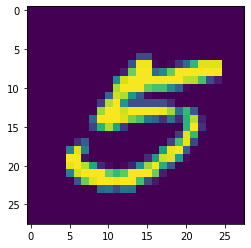

In [ ]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))

In [ ]:
print("prediction : ", sess.run(tf.argmax(hypot, 1), feed_dict={X:mnist.test.images[r:r+1]}))

prediction :  [5]


In [ ]:
sess.close()